In [2]:
import pandas as pd

occupancy = pd.read_csv('occupancy.csv')
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
occupancy.date = pd.to_datetime(occupancy.date)
occupancy.index = pd.DatetimeIndex(occupancy.date, freq='H')
occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,2015-02-02 15:00:00,23.718000,26.290000,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,2015-02-02 16:00:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,2015-02-02 17:00:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,2015-02-02 18:00:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2015-05-24 09:00:00,2015-05-24 09:00:00,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2015-05-24 10:00:00,2015-05-24 10:00:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2015-05-24 11:00:00,2015-05-24 11:00:00,24.330000,25.700000,817.000000,1125.800000,0.004841,1


mean : 717.7813974686562


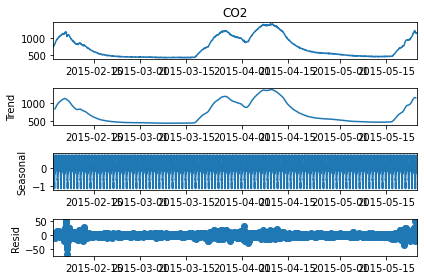

In [4]:

import statsmodels.api as sm
%matplotlib inline
print('mean :' , occupancy.CO2.mean())
res = sm.tsa.seasonal_decompose(occupancy.CO2)
resplot = res.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

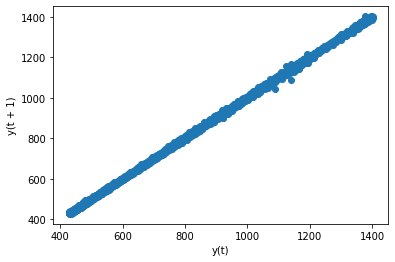

In [5]:
# from pandas.tools.plotting import lag_plot  NOT CORRECT, use:

from pandas.plotting import lag_plot


lag_plot(occupancy.CO2)

In [6]:
from statsmodels.tsa.ar_model import AR

train, test = occupancy.CO2[:-10], occupancy.CO2[-10:]
#model = AR(train)
model = AR(occupancy.CO2)
model_fit = model.fit(maxlag=1)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions

#accuracy = root of (quared sums of differences between observed and predicted)

date
2015-05-24 04:00:00    1152.725379
2015-05-24 05:00:00    1153.475525
2015-05-24 06:00:00    1152.625359
2015-05-24 07:00:00    1146.390813
2015-05-24 08:00:00    1145.623997
2015-05-24 09:00:00    1141.023102
2015-05-24 10:00:00    1150.474941
2015-05-24 11:00:00    1129.420844
2015-05-24 12:00:00    1126.020182
2015-05-24 13:00:00    1123.219637
Freq: H, dtype: float64

In [7]:
print(model_fit.params)

const     0.001078
L1.CO2    1.000195
dtype: float64


In [8]:
pd.DataFrame({'observed':occupancy.CO2, 'predicted':predictions})[-10:]

,observed,predicted
date,,
2015-05-24 04:00:00,1153.250000,1152.725379
2015-05-24 05:00:00,1152.400000,1153.475525
2015-05-24 06:00:00,1146.166667,1152.625359
2015-05-24 07:00:00,1145.400000,1146.390813
2015-05-24 08:00:00,1140.800000,1145.623997
2015-05-24 09:00:00,1150.250000,1141.023102
2015-05-24 10:00:00,1129.200000,1150.474941
2015-05-24 11:00:00,1125.800000,1129.420844
2015-05-24 12:00:00,1123.000000,1126.020182


In [9]:
from statsmodels.tsa.stattools import adfuller
# H0: series is not stationary
# H1: series is stationary
adfuller(occupancy.CO2)[1]


0.06822624483241069

In [10]:
# p is low, H0 must go? we do not reject the null-hypothesis


In [11]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(occupancy.CO2, order=(0, 1)) # moving average model: n=0 periods, q=1 period
model_fit = model.fit(disp=False)
predictions = model_fit.predict(len(occupancy.CO2)-3, len(occupancy.CO2)-1)

In [12]:
pd.DataFrame({'observed':occupancy.CO2[-3:], 'predicted':predictions})


,observed,predicted
date,,
2015-05-24 11:00:00,1125.8,926.765185
2015-05-24 12:00:00,1123.0,915.381418
2015-05-24 13:00:00,1124.0,923.899751


In [13]:
# fit model
model = ARMA(occupancy.CO2, order=(2,1)) # combined autoregression and moving average: n=2 periods, q= 1 period
model_fit = model.fit(disp=False)
# make prediction
predictions = model_fit.predict(len(occupancy.CO2)-3, len(occupancy.CO2)-1)

In [14]:
pd.DataFrame({'observed':occupancy.CO2[-3:], 'predicted':predictions})



,observed,predicted
date,,
2015-05-24 11:00:00,1125.8,1128.219411
2015-05-24 12:00:00,1123.0,1124.659478
2015-05-24 13:00:00,1124.0,1121.745557
